# Python Hello World Regression

In this notebook we will do a basic data analysis in python.  

Our goal is to see how the price of a used car depends on characteristics of the car (features.)  


We will:

* read in the data  
* transform and plot the data  
* fit a few simple regression models, getting fits, predictions and standard inference.  


## Import Needed Libraries   

We need to import numpy, pandas, and matplot.pyplot (as np, pd, and plt).  
numpy gives as vector/matrix/array operations,  
pandas gives us "data frames" data structures,  
and matplot.pyplot give us graphics.  

We also import LinearRegression from sklearn.linear_model to run the multiple regression.  

We also import statsmodels.api (as sm) to get inference and summaries (e.g. R-squared, t-stats, p-values) for multiple regression.  

We will use the OneHotEncoder to include a categorical variable in a linear regression model.

In [568]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

from sklearn.preprocessing import OneHotEncoder

## Read in the Data and Have a quick look at it


First we will read in the data from the file susedcars.csv on Rob's data page on bitbucket.  

You could also read directly from a local file.  
Use %pwd, %cd, %ls to see your working directory, change your working directory,and list files in your working
directory


In [569]:
%pwd

'/home/robert/do/webpage/python'

The commands preceded by % are "magic commands" that are part of ipython. 

Let's read  the data directly from bitbucket.  


In [570]:
cd = pd.read_csv("https://bitbucket.org/remcc/rob-data-sets/downloads/susedcars.csv")
print("*** the type of cd is:")
print(type(cd))

*** the type of cd is:
<class 'pandas.core.frame.DataFrame'>


The "type" in python is fantastic !!

Now that we know it is a DataFrame, let's get some more basic information.

In [571]:
print("***number number of rows and columns is: ",cd.shape)
print("***the column names are:")
print(cd.columns.values)

***number number of rows and columns is:  (1000, 7)
***the column names are:
['price' 'trim' 'isOneOwner' 'mileage' 'year' 'color' 'displacement']


In [572]:
cd.head()

price trim isOneOwner   mileage  year   color displacement
0  43995  550          f   36858.0  2008  Silver          5.5
1  44995  550          f   46883.0  2012   Black          4.6
2  25999  550          f  108759.0  2007   White          5.5
3  33880  550          f   35187.0  2007   Black          5.5
4  34895  550          f   48153.0  2007   Black          5.5

Each of the 1,000 rows corresponds to a used car.  

price is what the car sold for.   

The other variables are *features* describing the car.   
Our goal is to relate the price to the other features.

Note the notation for head.  
We call the head *method* on the object referred to by cd.

We can pull one column (variable) out of the data frame by name.

In [573]:
temp = cd['mileage']  # pull out the variable mileage
temp.head()  # print out the mileage of the first few cars

0     36858.0
1     46883.0
2    108759.0
3     35187.0
4     48153.0
Name: mileage, dtype: float64

 The feature mileage is a numeric variable with units miles. We can summarize it using the usual descriptive summaries:

In [574]:
cd['mileage'].describe()   # summary statistics of variable mileage

count      1000.000000
mean      73652.408000
std       42887.422189
min        1997.000000
25%       40132.750000
50%       67919.500000
75%      100138.250000
max      255419.000000
Name: mileage, dtype: float64

The feature color is a categorical variable.  Each car is in one of the color categories.  We can't summarize a categorical variable the same way that we
summarize a numeric variable.  There is no "average" color.  To summarize a
categorical variable we simply count how many observations are in each category.

In [575]:
print(cd['color'].head())  # colors of first 5 cars
cd['color'].value_counts() # how many cars have each color

0    Silver
1     Black
2     White
3     Black
4     Black
Name: color, dtype: object


color
Black     415
other     227
Silver    213
White     145
Name: count, dtype: int64

## Use iloc to subset a data frame

You can also use integers to pick off rows and columns using **iloc**.

In [576]:
cd.columns.values

array(['price', 'trim', 'isOneOwner', 'mileage', 'year', 'color',
       'displacement'], dtype=object)

In [577]:
XXdf = cd.iloc[:,[4,0]] #year and price
XXdf.head()

year  price
0  2008  43995
1  2012  44995
2  2007  25999
3  2007  33880
4  2007  34895

In [578]:
cd.iloc[0:3,[4,0]] #pick off rows and columns

year  price
0  2008  43995
1  2012  44995
2  2007  25999

**Note that in python, indexing starts at 0.** 

The range of indices a to b gives from a to b-1, b is not included.

For example:

In [579]:
temp = [1,2,3,7]
print(temp[0]) # the first element
print(temp[-1]) # the last elemnt
temp[0:3] #the 0, 1, and 2 element of the list temp

1
7


[1, 2, 3]

## Pick off  y=price and x=(mileage,year) and scale

Let's focus on the two numeric features mileage and year.   
Our goal will be to see how price relates to mileage and year.  
We will divide both price and mileage by 1,000 to make the results easier to understand.  

In [580]:
cd = cd[['price','mileage','year']]
cd['price']  /= 1000
cd['mileage']  /= 1000
print(cd.head())

    price  mileage  year
0  43.995   36.858  2008
1  44.995   46.883  2012
2  25.999  108.759  2007
3  33.880   35.187  2007
4  34.895   48.153  2007


In [581]:
print(cd.describe()) #summarize each column

             price      mileage         year
count  1000.000000  1000.000000  1000.000000
mean     30.583318    73.652408  2006.939000
std      18.411018    42.887422     4.194624
min       0.995000     1.997000  1994.000000
25%      12.995000    40.132750  2004.000000
50%      29.800000    67.919500  2007.000000
75%      43.992000   100.138250  2010.000000
max      79.995000   255.419000  2013.000000


In [582]:
print(cd.corr()) #compute the correlation between each column

            price   mileage      year
price    1.000000 -0.815246  0.880537
mileage -0.815246  1.000000 -0.744729
year     0.880537 -0.744729  1.000000


Remember, a correlation is between -1 and 1.  

The closer the correlation is to 1, the stronger the linear relationship between the variables,
with a positive slope.  

The closer the correlation is to -1, the stronger the linear relationship between the variables,
with a negative slope. 

So it looks like the bigger the mileage is, the lower the price of the car.  
The bigger the year is, the higher the price of the car.  

Makes sense!!

## Y and x, Features  and Target

We often use "y" to generically denote the variable we trying to predict and "x" to denote
the variables we can use to predict y.  

In our example y=price and x=(mileage,year).  

x=(mileage,year) is the what we know about the car.  Given this knowledge, what is our
guess for the price of the car.  

As we have done above, x is also often called the *features*.  
x is also often called the independent variables.

Y (or y) is often called the dependent variable or the target.

## Functions, methods, attributes, data structures

Python has a few key data structures built in and then we have to know a few more.  
    
Built in ones are:
* tuple
* lists
* dictionaries

We also have to work with numpy ndarrays and pandas Series and DataFrames.

As we can then call functions with objects as arguments and outputs.  

Python is object orientated so we also need to me award of methods and attributes of objects.

A couple of examples:



In [583]:
## a tuple
print('\n#### tuple')
x = (1,2) 
print(type(x))

print(x[0])
#x[0]= 7.4  # does not work, tuple is immutable
# note y = (5,) not y=(5) for a typle with one element

## a list
print('\n#### list')
x = [1,3.4,'rob']
print(type(x))
print(f'length of x is {len(x)}')
x[2] = 'robert'
print(x)

## a dictionaries
print('\n#### dictionaries')
x = {'rob': 14, 'ira': 13}
print(x)
x['rob'] = 7  # you access the value from the key
print(x)
print(x.keys())
print(x.values())


#### tuple
<class 'tuple'>
1

#### list
<class 'list'>
length of x is 3
[1, 3.4, 'robert']

#### dictionaries
{'rob': 14, 'ira': 13}
{'rob': 7, 'ira': 13}
dict_keys(['rob', 'ira'])
dict_values([7, 13])


In [584]:
## numpy ndarray
print('\n#### ndarray')
x = np.array([[12,14.7],[13.2,55.8],[34,77.8]])
print(x)
print(x.shape)
print(x.dtype)


#### ndarray
[[12.  14.7]
 [13.2 55.8]
 [34.  77.8]]
(3, 2)
float64


In [585]:
print(type(x.shape)) ## attribute
print(type(x.mean)) ## method
print(x.mean()) # method
print(np.mean(x)) # function
print(x.mean(axis=0)) #column means
print(x.mean(axis=1)) # row means

print('\n\n')
print(x[:,0]) #first column
print(x[0:2,0]) # first two rows, first column
print(x[[0,2],1]) # first and third row, second column

<class 'tuple'>
<class 'builtin_function_or_method'>
34.583333333333336
34.583333333333336
[19.73333333 49.43333333]
[13.35 34.5  55.9 ]



[12.  13.2 34. ]
[12.  13.2]
[14.7 77.8]


In [586]:
## DataFrame
print('\n#### DataFrame')
xdf = pd.DataFrame(x) #DataFrame from a numpy ndarray
print(type(xdf))
print(xdf)


#### DataFrame
<class 'pandas.core.frame.DataFrame'>
      0     1
0  12.0  14.7
1  13.2  55.8
2  34.0  77.8



If you call the function dir on an object, you get a list of all the attributes and methods!!  
The methods and attributes with __ are for "internal use".

In [587]:
x=[1,2,3]
dir(x)

['__add__',
 '__class__',
 '__class_getitem__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__rmul__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'append',
 'clear',
 'copy',
 'count',
 'extend',
 'index',
 'insert',
 'pop',
 'remove',
 'reverse',
 'sort']

## Help

If you want help anything with name junk,   just put j? junk at the prompt.  
This works on variables, modules, and just about anything!!   

Tab completion and wild cards are very powerfull.  
Try:  
```x = np.arange(0,5)```  
```x.<TAB>```  
```x.m<TAB>```  
```x.*pr*?<RETURN>```  
```np.<TAB>```  

## Get y=price and X=(mileage,year) as numpy ndarrays  

Let's get a numpy array X whose 2 columns are the explanatory features *mileage* and *year*.  

Let's also get a numpy array with just the target variable y = *price*.

You don't have to go to numpy, you could stick with pandas objects, but I like numpy for this.

In [588]:
X = cd[['mileage','year']].to_numpy()  #mileage and year columns as a numpy array
print("*** type of X is",type(X))
print(X.shape) #number of rows and columns
print(X[0:4,:]) #first 4 rows
y = cd['price'].values #price as a numpy vector
print(f'length of y is {len(y)}')
print(y[:4]) #implicit start at 0

*** type of X is <class 'numpy.ndarray'>
(1000, 2)
[[  36.858 2008.   ]
 [  46.883 2012.   ]
 [ 108.759 2007.   ]
 [  35.187 2007.   ]]
length of y is 1000
[43.995 44.995 25.999 33.88 ]


## Plot y vs each x, histogram of y  

Now let's plot year vs. price.  


Text(0.5, 1.0, 'year vs. price')

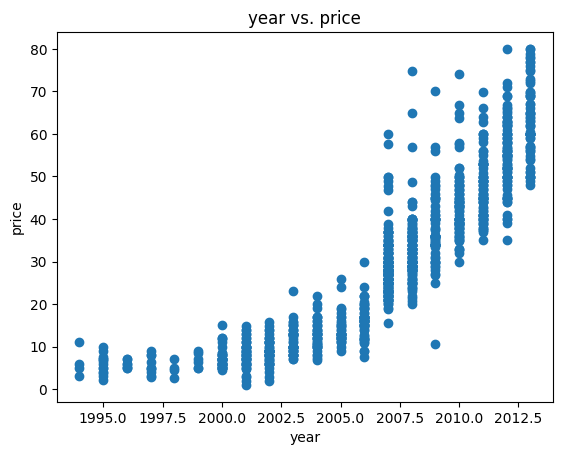

In [589]:
plt.scatter(X[:,1],y)
plt.xlabel("year")
plt.ylabel("price")
plt.title("year vs. price")

And mileage vs. price.  
Let's change the plot symbol, the size of the plotted symbol and the color of the plotted symbol.  
We will also change the size of the figure.

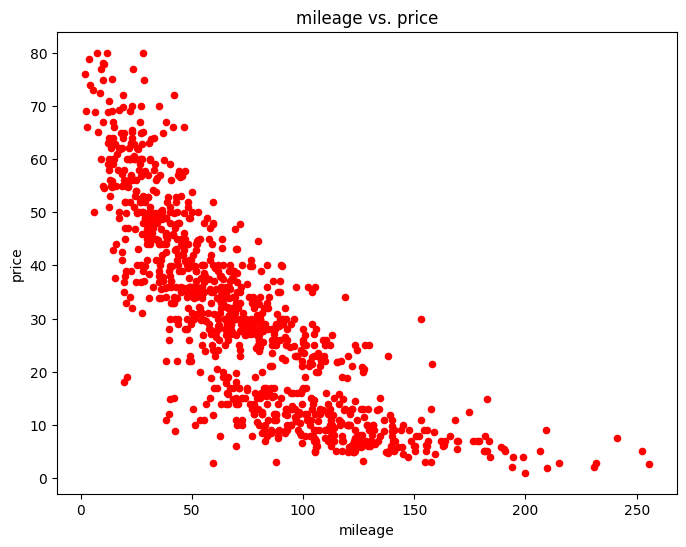

In [590]:
plt.scatter(X[:,0],y,s=20,c="red",marker='o')
plt.xlabel("mileage")
plt.ylabel("price")
plt.title("mileage vs. price")
figure = plt.gcf()
figure.set_size_inches(8,6)

Let's look at the histogram of price.  

Text(0.5, 0, 'price')

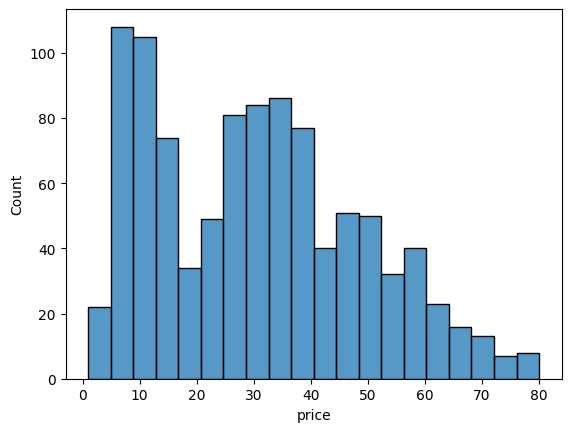

In [591]:
p = sns.histplot(y,bins=20)
p.set_xlabel('price')

Clearly, price is related to both year and mileage.  
Clearly, the relationship is not linear !!!  

What we really want to **learn** is the joint relationship betwee *price* and the pair of variables
(*mileage*,*year*) !!!  

Essentially, the modern statistical tools or *Machine Learning* enables us to learn the relationships
from data without making strong assumptions.

In the expression:

$$
price = f(mileage,year)
$$

we would like to know the function $f$.

### plot with pandas

You can do a lot of the plotting directly in pandas.

<Axes: xlabel='year', ylabel='price'>

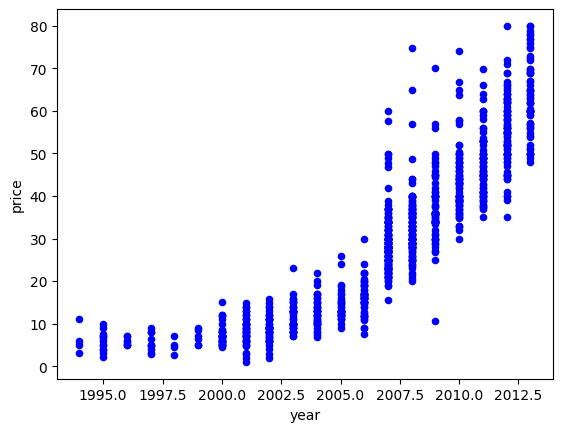

In [592]:
cd.plot.scatter(2,0,c="blue") #access columns 0 and 2 = mileage and price

<Axes: xlabel='mileage', ylabel='price'>

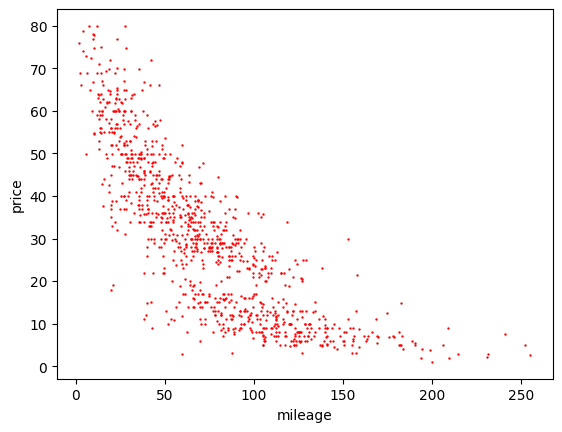

In [593]:
cd.plot.scatter('mileage','price',c="red",s=.5) # access columns using names

A nice seaborn plot:

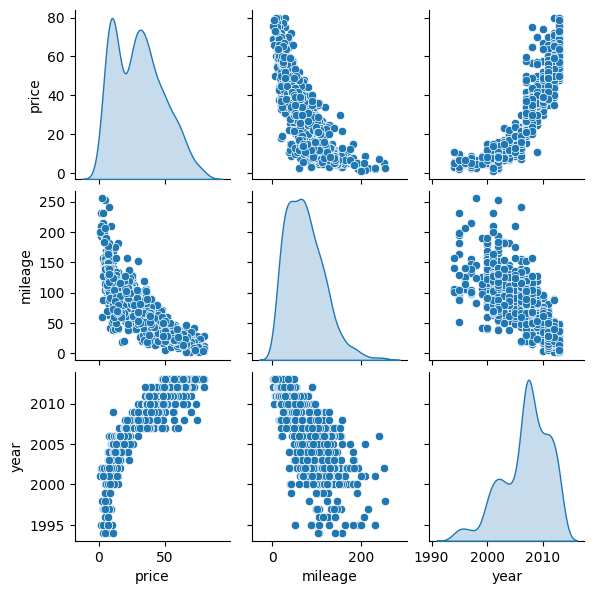

In [594]:
sns.pairplot(cd,diag_kind='kde',height=2)

## Regression with just mileage

Our goal is to relate y=price to x=(mileage,price).  
Let's start simple and just use mileage.  

Our *simple linear regression model* is

$$
price = \beta_0 + \beta_1 \, mileage + \epsilon
$$

$\epsilon$ represents the part of price we cannot learn from mileage.  

Let's get a numpy array with just one column for mileage.  
I'll reshape it so that it is a two dimensional array instead of a vector.  

In [595]:
X1 = X[:,0] # first column of X is mileage
print(X1.shape)
X1 = X1.reshape((X.shape[0],1))
print(X1.shape)
print(X1[:4])

(1000,)
(1000, 1)
[[ 36.858]
 [ 46.883]
 [108.759]
 [ 35.187]]


Ok, now let's fit our simple linear regression model using mileage.  

We will use LinearRegression from sklearn.  
It will be a two step process.  
We first create the model object and then we call the fit method with the training data. 

In [596]:
lmmod1 = LinearRegression(fit_intercept=True) #model object
lmmod1.fit(X1,y) # (X1,y) is the training data
print("Model Slope:    ",lmmod1.coef_)
print("Model Intercept:",lmmod1.intercept_)

Model Slope:     [-0.34997452]
Model Intercept: 56.359784475930795


Our fitted model is
$$
price = 56.36 - .35 \, mileage + \epsilon
$$

Let's plot the training data with the fitted line.  

(-5.0, 82.0)

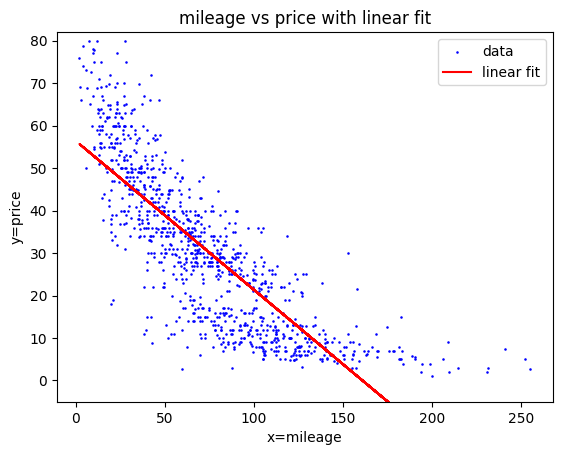

In [597]:
yhat = lmmod1.intercept_ + lmmod1.coef_ * X1
plt.scatter(X1,y,c='blue',s=.7,label='data')
plt.plot(X1,yhat,c='red',label='linear fit')
plt.legend()
plt.xlabel('x=mileage'); plt.ylabel('y=price')
plt.title("mileage vs price with linear fit")
plt.ylim((-5,82))

Pretty bad!!

## Run The Regression of y=price on X=(mileage,year)  

Now let's run a linear regression of *price* on *mileage* and *year*.  

Our model is:  

$$
price = \beta_0 + \beta_1 mileage + \beta_2 year + \epsilon
$$

This model assumes a linear relationship.  

*We already suspect this may be a bad idea* !!!  

Let's go ahead and *fit* the model.  

Fitting the model to data will give us estimates of the 
parameters $(\beta_0,\beta_1,\beta_2)$.  

The error term $\epsilon$ represents the part of price we cannot
know from (*mileage*,*year*).  



In [598]:
lmmod = LinearRegression(fit_intercept=True)
lmmod.fit(X,y) # (X,y) is the training data
print("Model Slopes:    ",lmmod.coef_)
print("Model Intercept:",lmmod.intercept_)

Model Slopes:     [-0.1537219   2.69434954]
Model Intercept: -5365.489872256993


Note that there does not seem to be a simple regression summary in sklearn.
Maybe that is a good thing !!!!.

So, the fitted relationship is  
$$
price = -5365.49  - 0.154 \, mileage + 2.7 \, year
$$

If we just use on feature, we can visualize the regression fit in a very simple way.  

### Looking at the LinearRegression object lmmod

Let's have a quick look at the lmmod object.

In [599]:
print(lmmod)
print(lmmod.get_params())

LinearRegression()
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}


Above we see the basic attributed you can set when using LinearRegression.  
Some are obvious, like fit_intercept controls whether or not an intercept is included in the regression.  
For others you would try (i) ?lmmod (ii) Read the sklearn documentation (iii) google it, (iv) read a book.

In [600]:
dir(lmmod) #you can always find out a lot about an object with dir() !!

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_n_features',
 '_decision_function',
 '_estimator_type',
 '_get_default_requests',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_set_intercept',
 '_validate_data',
 '_validate_params',
 'coef_',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_metadata_routing',
 'get_params',
 'intercept_',
 'n_features_in_',
 'n_jobs',
 'positive',
 

Some of the things in llmod are attributes (data structures) and some are methods (functions).
Usually the members with trailing underscores (like coef_) are data members and the members without are methods.

In [601]:
print(type(lmmod.coef_))
type(lmmod.set_params)

<class 'numpy.ndarray'>


method

So, you could do ?lmmod.set_params at a python prompt.

## Get and Plot the Fits 

Let's get the fitted values.  

For each observation in our data set the fits are
$$
\hat{price}_i = -5365.49  - 0.154 \, mileage_i + 2.7 \, year_i, \;\; i=1,2,\ldots,n.
$$

You can think of the fit as the predicted price give the values of *mileage* and *year* according
to the model.  

Notice that the coefficient for mileage is different from the one we got in the simple linear
regression of price on mileage alone !!


In [602]:
yhat = lmmod.predict(X)
print("the length of yhat is",len(yhat))
print("the type of yhat is:")
print(type(yhat))

the length of yhat is 1000
the type of yhat is:
<class 'numpy.ndarray'>


Text(0, 0.5, 'yhat')

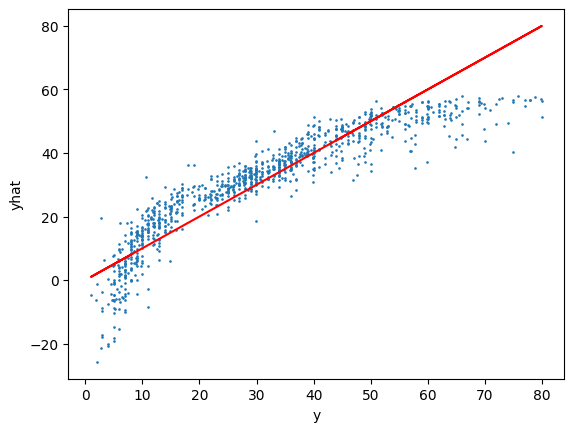

In [603]:
plt.scatter(y,yhat,s=.8) 
plt.plot(y,y,c='red') #add the line
plt.xlabel("y"); plt.ylabel("yhat")

**Clearly, it is really bad !!!**  

Machine Learning will enable us to get it right fairly automatically.  



## Predictions

Let's get predictions for *x* not in our training data.  

We will make a numpy array whose rows have the x values we want to predict at.  


In [604]:
Xp = np.array([[40,2010],[100,2004]],dtype=float)
print(Xp)
print(type(Xp))
print(Xp.dtype)

[[  40. 2010.]
 [ 100. 2004.]]
<class 'numpy.ndarray'>
float64


So, the first car has 40 (thousand) miles on it and is a 2010, while
the second car has 100 (thousand) miles on it and is a 2004.  
Clearly, we expect the second car to sell for less!  

In [605]:
ypred = lmmod.predict(Xp)
print(ypred)

[44.00383414 18.61442272]


So we predict (based on the linear model) that the first car will sell for
44 (thou) and the second car will sell for 18.6.

Let's check the first one "by hand".  

Model Slopes:     [-0.1537219   2.69434954]  
Model Intercept: -5365.489872256993

So the prediction for the first car in ```Xp``` should be:  


In [606]:
-5365.49 - .1537*40 + 2.69434954*2010

44.00457540000025

which is correct.

## In-sample/out of sample, training data

The data we used to "fit" our model, is called the *training data*.  
When we look at predictions for observations in the training data
(as we did for ```yhat```)
we say we are looking at *in-sample* fits.  

When we predict at observations not in the training data (as we did for ```ypred```), then we are
predicting *out of sample*.  

Out of sample prediction is the name of the game in directed machine learning !!!!

## scikit-learn

Linear Regression is a basic model.  
There are many modeling approaches in Machine Learning !!  
scikit-learn has a nice general approach to working with models:

    - a model will have a set of hyperparameters (e.g. lmmod.fit_intercept)  
    - given the hyparameters, the model can learn from training data by calling the fit method (e.g lmmod.fit(X,y))  
    - given a model has learned, it can make predictions (e.g. lmmod.predict(Xp))  
 
All the predictive models in scikit-learn use the basic setup.

## Standard Regression Output

From our linear regression fit using sklearn, we got estimates for the parameters.  

Often we want to know a lot more about the model fit.  

In particular,  we might want to know the *standard errors* associated with the parameter
estimates.  

To get the usual *regression ouput* we can us the python package statsmodels, imported above as sm.

In [607]:
X = sm.add_constant(X) #appends 1 to beginning of each row for the intercept
print(X[0:3,:]) # you can see the 1's
results = sm.OLS(y, X).fit() #run the regression
print(results.summary()) # print out the usual summaries

[[1.00000e+00 3.68580e+01 2.00800e+03]
 [1.00000e+00 4.68830e+01 2.01200e+03]
 [1.00000e+00 1.08759e+02 2.00700e+03]]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     2477.
Date:                Mon, 27 Jan 2025   Prob (F-statistic):               0.00
Time:                        12:23:02   Log-Likelihood:                -3438.1
No. Observations:                1000   AIC:                             6882.
Df Residuals:                     997   BIC:                             6897.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------

Lot's of junk!!   

In particular, the standard error associate with the estimate of the slope for *mileage* is .008.  

The 95\% confidence interval for $\beta_1$, the *mileage* slope is estimate +/- 2 standard errors:

In [608]:
-0.1537 + np.array([-2,2])*0.008

array([-0.1697, -0.1377])

Recall that $R^2$ is the square of the correlation between $y$ and $\hat{y}$:

In [609]:
np.corrcoef(y,yhat)

array([[1.        , 0.91238967],
       [0.91238967, 1.        ]])

In [610]:
.91239**2

0.8324555121

Which is the same as the ```R-squared``` in the regression output.

Let's compare to the R-squared with just mileage.  

In [611]:
yhat1 = lmmod1.predict(X1)
np.corrcoef(y,yhat1)

array([[1.        , 0.81524579],
       [0.81524579, 1.        ]])

In [612]:
.815**2

0.664225

## Let's try the variable color

Does knowing the color of a car help us predict the price ?  

Let's try it.  
How do we add the categorical variable color to a linear regression model?  

Let's pull the 1's back out of X.


In [613]:
Xo = X[:,1:]
print(Xo.shape)
print(Xo[:5,:])
print(y.shape)
print(y[:5])      

(1000, 2)
[[  36.858 2008.   ]
 [  46.883 2012.   ]
 [ 108.759 2007.   ]
 [  35.187 2007.   ]
 [  48.153 2007.   ]]
(1000,)
[43.995 44.995 25.999 33.88  34.895]


Now we have to make the dummies for color.  

In [614]:
cdn = pd.read_csv("https://bitbucket.org/remcc/rob-data-sets/downloads/susedcars.csv")
denc = OneHotEncoder(sparse_output=False)
dums = denc.fit_transform(cdn[['color']])
print(type(dums))
print(dums.shape)

<class 'numpy.ndarray'>
(1000, 4)


In [615]:
print(cdn['color'][:6])
print(dums[:6,:])

0    Silver
1     Black
2     White
3     Black
4     Black
5     other
Name: color, dtype: object
[[0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]]


So, the first columns is a binary indicator (dummy) for color = Black, second for color = Silver and so on.  
We use three of the four dummies (columns of dums) since we will include an intercept in our  
regression model fit.  

Let's check the dummies.

In [616]:
print(dums.sum(axis=0))
print(cdn['color'].value_counts())
temp = dums.sum(axis=1)
print((temp.min(),temp.max()))

[415. 213. 145. 227.]
color
Black     415
other     227
Silver    213
White     145
Name: count, dtype: int64
(1.0, 1.0)


ok, now let's add three of the dummies to x and run the regression.  

In [617]:
XX = np.hstack([Xo,dums[:,1:]])
XX[:6,:]

array([[3.68580e+01, 2.00800e+03, 1.00000e+00, 0.00000e+00, 0.00000e+00],
       [4.68830e+01, 2.01200e+03, 0.00000e+00, 0.00000e+00, 0.00000e+00],
       [1.08759e+02, 2.00700e+03, 0.00000e+00, 1.00000e+00, 0.00000e+00],
       [3.51870e+01, 2.00700e+03, 0.00000e+00, 0.00000e+00, 0.00000e+00],
       [4.81530e+01, 2.00700e+03, 0.00000e+00, 0.00000e+00, 0.00000e+00],
       [1.21748e+02, 2.00200e+03, 0.00000e+00, 0.00000e+00, 1.00000e+00]])

In [618]:
lmmodc = LinearRegression(fit_intercept=True)
lmmodc.fit(XX,y)
print('model slopes:',lmmodc.coef_)
print('model intercept:',lmmodc.intercept_)

model slopes: [-0.15279754  2.65510051 -1.89099684  1.97733492 -1.16044138]
model intercept: -5286.408055872575


Now let's plot the fits.

Text(0, 0.5, 'yhat with color')

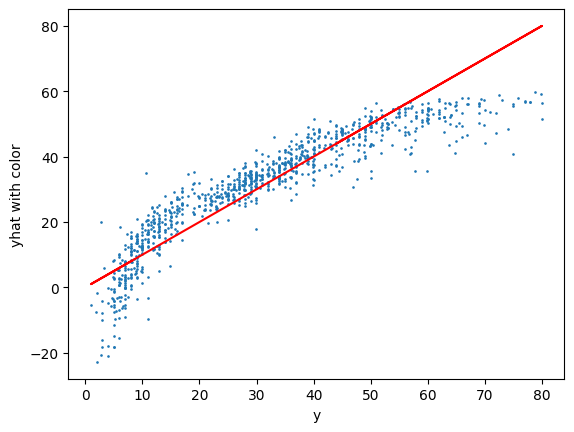

In [619]:
yhatc = lmmodc.predict(XX)
plt.scatter(y,yhatc,s=.8)
plt.plot(y,y,c='red')
plt.xlabel('y'); plt.ylabel('yhat with color')

In [620]:
cvec = cdn['color'].to_numpy()
cvec[cvec=='Black'] = 'black'
cvec[cvec=='Silver'] = 'purple'
cvec[cvec=='other'] = 'darkgrey'
cvec[cvec=='White'] = 'red'

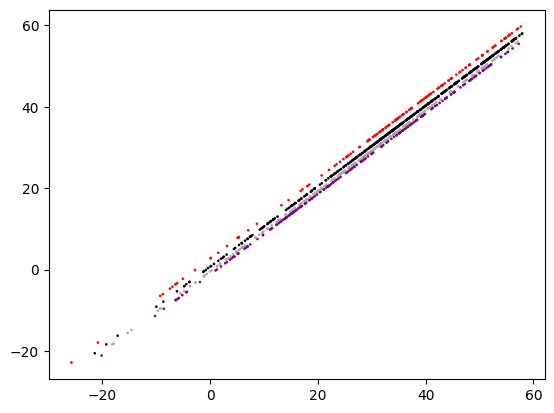

In [621]:
plt.scatter(yhat,yhatc,s=.8,c=cvec)

Let's get R-squared.

In [622]:
temp = np.corrcoef(y,yhatc)[0,1]
np.round(temp**2,4) # R-squared

0.8367

## Regression In Matrix Notation

Let's write our multiple regression model using vector/matrix notation and use 
basic matrix operations to check the predicted and fitted values.

The general multiple regression model is written:

$$
Y_i = \beta_0 + \beta_1  x_{i1} + \beta_2  x_{i2} + \ldots  \beta_p  x_{ip} + \epsilon_i, \; i=1,2,\ldots,n,
$$

where $i$ indexes observations and $x_{ij}$ is the value of the $j^{th}$ $x$ in the 
$i^{th}$ observation.

If we let  

\begin{equation}
x_i = \left[
\begin{array}{c}
1 \\
x_{i1} \\
x_{i2} \\
\vdots \\
x_{ip}
\end{array}
\right], \;
X= \left[
\begin{array}{c}
x_1' \\
x_2' \\
\vdots \\
x_n'
\end{array}
\right], \;\;
y = \left[
\begin{array}{c}
y_1 \\
y_2 \\
\vdots \\
y_n
\end{array}
\right], \;\;
\epsilon = \left[
\begin{array}{c}
\epsilon_1 \\
\epsilon_2 \\
\vdots \\
\epsilon_n
\end{array}
\right], \;\;
\beta = \left[
\begin{array}{c}
\beta_0 \\
\beta_1 \\
\beta_2 \\
\vdots \\
\beta_p
\end{array}
\right]
\end{equation},

then we can write the model in matrix form:

$$
y = X \beta + \epsilon.
$$

In our data, the first three rows of $X$ are

In [623]:
X[0:3,:]

array([[1.00000e+00, 3.68580e+01, 2.00800e+03],
       [1.00000e+00, 4.68830e+01, 2.01200e+03],
       [1.00000e+00, 1.08759e+02, 2.00700e+03]])

Which correspond to the the first three rows of our data frame cd:

In [624]:
cd.iloc[0:3,1:3] 

mileage  year
0   36.858  2008
1   46.883  2012
2  108.759  2007

Given our estimates:

\begin{equation}
\hat{\beta} = \left[
\begin{array}{c}
\hat{\beta}_0 \\
\hat{\beta}_1 \\
\vdots \\
\hat{\beta}_p
\end{array}
\right]
\end{equation}


We can get fitted values or predictions by matrix multiplication:
$$
\hat{y} = X \, \hat{\beta}, \;\; \mbox{or}, \;\; \hat{y}_p = X_p \, \hat{\beta}.
$$

In our example,  


In [625]:
bhat = np.hstack([lmmod.intercept_,lmmod.coef_])[:,np.newaxis]
print(bhat.shape)
bhat

(3, 1)


array([[-5.36548987e+03],
       [-1.53721903e-01],
       [ 2.69434954e+00]])

So we can get our predictions by multiplying $X_p$ times $\hat{\beta}$.  

But first we have to add the column of ones:  


In [626]:
Xpp = np.hstack([np.ones((2,1)),Xp])
print("Xp:\n",Xp)
print("Xpp:\n",Xpp)

Xp:
 [[  40. 2010.]
 [ 100. 2004.]]
Xpp:
 [[1.000e+00 4.000e+01 2.010e+03]
 [1.000e+00 1.000e+02 2.004e+03]]


Now we can matrix multiply $X_{pp}$ times $\hat{\beta}$:  
    

In [627]:
yhatp = Xpp @ bhat # Xpp * bhat, matrix multiplication
yhatp

array([[44.00383414],
       [18.61442272]])

This is the same as what we got using the predict method on the lmmod object.  

Let's get the in-sample fitted values by multiplying $X \hat{\beta}$:  


In [628]:
yhatm = X @ bhat
print(yhatm[0:3,:])
print(yhat[0:3]) #got these ones using the predict method

[[39.09812927]
 [48.33446537]
 [25.3510212 ]]
[39.09812927 48.33446537 25.3510212 ]


In [629]:
dyhat = yhatm.flatten() - yhat
dyhat.shape

(1000,)

In [630]:
dyhat.mean()

-9.094947017729283e-16

In [631]:
dyhat.var()

8.263534319404751e-28

```dyhat``` has 0 mean and variance, so it must be all zeros.  

Just for fun we can plot yhat vs yhatm:  


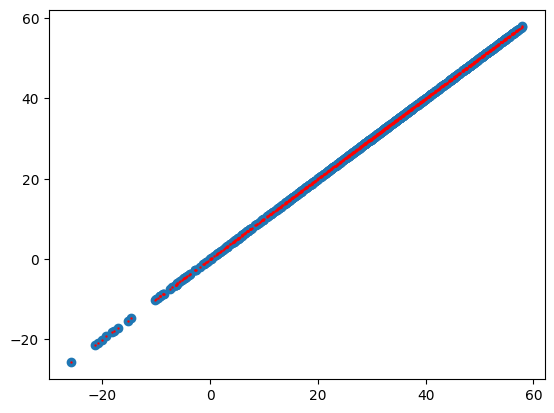

In [632]:
plt.scatter(yhat,yhatm)
plt.scatter(yhat,yhat,color='red',s=.5)
plt.show()